In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
import time

import warnings
warnings.filterwarnings(action="ignore")
pd.set_option('display.max_columns', None)

df = pd.read_csv("D:\\presentation\\find_smokers_by_vital_signs_dataset\\smoking.csv")
df.describe()




,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [18]:
print(df.dtypes)

ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object


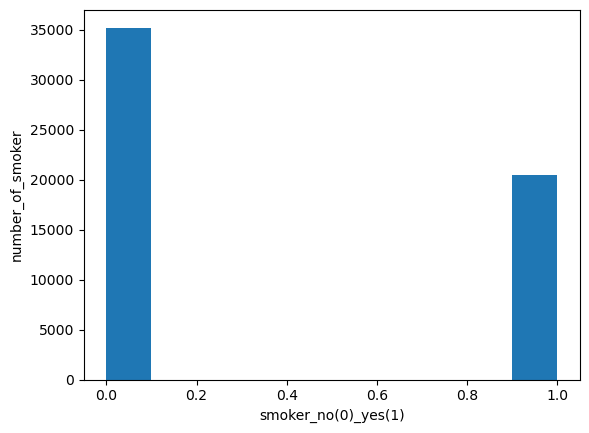

In [19]:

plt.hist(df['smoking'])
plt.xlabel("smoker_no(0)_yes(1)")
plt.ylabel("number_of_smoker")
plt.show()

In [20]:
# df = df.set_index('ID')
print(df)

          ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0      F   40         155          60       81.3             1.2   
1          1      F   40         160          60       81.0             0.8   
2          2      M   55         170          60       80.0             0.8   
3          3      M   40         165          70       88.0             1.5   
4          4      F   40         155          60       86.0             1.0   
...      ...    ...  ...         ...         ...        ...             ...   
55687  55676      F   40         170          65       75.0             0.9   
55688  55681      F   45         160          50       70.0             1.2   
55689  55683      F   55         160          50       68.5             1.0   
55690  55684      M   60         165          60       78.0             0.8   
55691  55691      M   55         160          65       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(righ

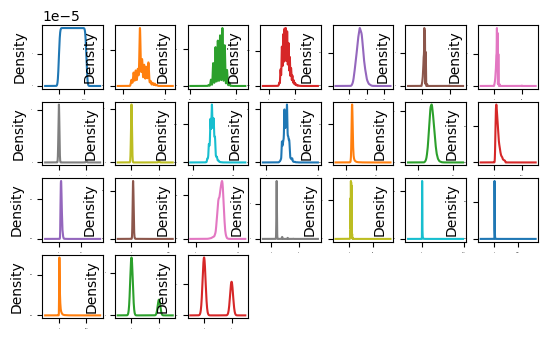

In [23]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

In [26]:
df['gender'] = df['gender'].map({'M':1,'F':0})
df['tartar'] = df['tartar'].map({'Y':1,'N':0})
df['oral'] = df['oral'].map({'Y':1,'N':0})
print(df)


          ID  gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0       0   40         155          60       81.3             1.2   
1          1       0   40         160          60       81.0             0.8   
2          2       1   55         170          60       80.0             0.8   
3          3       1   40         165          70       88.0             1.5   
4          4       0   40         155          60       86.0             1.0   
...      ...     ...  ...         ...         ...        ...             ...   
55687  55676       0   40         170          65       75.0             0.9   
55688  55681       0   45         160          50       70.0             1.2   
55689  55683       0   55         160          50       68.5             1.0   
55690  55684       1   60         165          60       78.0             0.8   
55691  55691       1   55         160          65       85.0             0.9   

       eyesight(right)  hearing(left)  

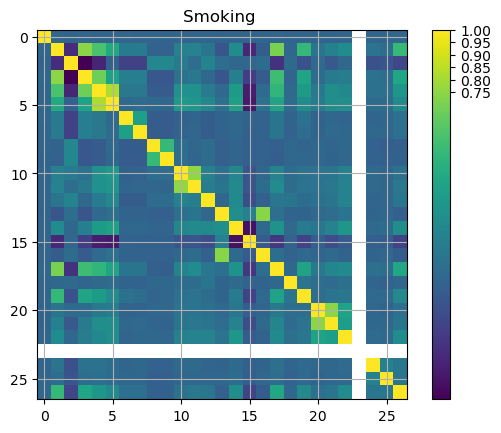

In [27]:
from matplotlib import cm as cm
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(df.corr(), interpolation="none")
ax1.grid(True)
plt.title('Smoking ')
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [33]:

Y = df['smoking'].values
X = df.drop('smoking', axis=1).values


x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.33, random_state=21)

models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('LR', LogisticRegression()))  
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))


num_folds = 10

results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    start_Time = time.time()
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    end_Time = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%-7s: %10f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end_Time-start_Time))


CART   :   0.751669 (0.005822) (run time: 5.394348)
LR     :   0.697988 (0.004577) (run time: 2.802902)
NB     :   0.705518 (0.006014) (run time: 0.261850)
KNN    :   0.646451 (0.006347) (run time: 3.807220)


In [41]:
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(solver='liblinear'))])))  # Updated solver
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))

results = []
names = []

print("\n\n\nAccuracies of algorithms after scaling dataset\n")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print("%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))





Accuracies of algorithms after scaling dataset

ScaledCART: 0.751186 (0.005187) (run time: 5.369477)
ScaledLR: 0.747112 (0.006385) (run time: 2.070091)
ScaledNB: 0.705732 (0.007338) (run time: 0.421673)
ScaledKNN: 0.732426 (0.004224) (run time: 4.100925)
